<img src="https://imgur.com/3U3hI1u.png" width="100%" />

#### Boas vindas a sua segunda e última tarefa de Aprendizado por Reforço!

Neste exercício, você deverá implementar e comparar diferentes algoritmos de **Aprendizado por Reforço Profundo** utilizando a biblioteca _[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)_.

A _Stable Baselines_ é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes, além de várias funcionalidades úteis para seu treinamento. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

Antes de começar a tarefa, é importante acessar e se familiarizar com o tutorial da biblioteca disponível neste repositório! Depois de rodar o guia, você já estará capaz de completar este trabalho.

## Escolha do Ambiente

Antes de analisar o possíveis algoritmos, o primeiro passo é escolher qual ambiente você quer resolver! Para esta tarefa, separamos dois possíveis ambientes diferentes, em ordem de dificuldade, que você poderá escolher: **CartPole** e **Pendulum**. Lembrando que, quanto mais difícil um ambiente, mais demorado será o treinamento.

A seguir, estão as descrições de cada um deles:

<h2 align="center">CartPole</h2>
<img src="https://bytepawn.com/images/cartpole.gif" width=50% />

**CartPole** é o ambiente de Aprendizado por Reforço mais comum do Gym, no qual deve-se balancear um pêndulo invertido conectado a um carrinho, somente controlando os movimentos do carrinho.

### Características do Ambiente

O **Espaço de Observação** do CartPole é definido por 4 informações:

<br>

|     | Informação                         | Min     | Max    |
| :-- | :--------------------------------- | :-----: | :----: |
| 0   | Posição do Carrinho                | -4.8    | 4.8    |
| 1   | Velocidade do Carrinho             | -Inf    | Inf    |
| 2   | Ângulo da Barra                    | -24 deg | 24 deg |
| 3   | Velocidade na Extremidade da Barra | -Inf    | Inf    |

<br>

A posição do carrinho vai de -4.8 a 4.8, mas ele perde o episódio caso saia dos limites de -2.4 e 2.4. Da mesma forma, o ângulo da barra vai de -24° a 24°, porém o episódio acaba caso a barra saia dos limites de -12° e 12°.

Já o **Espaço de Ação** é composto por duas ações únicas: mover o carrinho para a **esquerda** ou para a **direita**.

Quando queremos mover o carrinho para a esquerda, fazemos um `env.step(0)`; quando queremos movê-lo para a direita, enviamos um `env.step(1)`

| Ação | Significado           |
| :--- | :-------------------- |
| 0    | Mover para a esquerda |
| 1    | Mover para a direito  |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, que é igual a +1 para cada instante que passa sem o agente perder. Assim, o CartPole é incentivado a sobreviver por mais tempo.

Para testar o modelo, vamos precisar de 2 bibliotecas: **gym** (para inicialização dos ambientes) e **stable_baselines3** (para inicialização e avaliação dos modelos):

In [1]:
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

# Definindo ambiente
env = gym.make("CartPole-v1")

# Definindo modelo
model = PPO("MlpPolicy", env, seed=1, verbose=1)

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Recompensa Média: 8.60 +/- 0.4898979485566356


d:\Python\Turing\Trainee-RL-2021\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


<h2 align="center">Pendulum</h2>

<img src="https://www.gymlibrary.ml/_static/videos/classic_control/pendulum.gif" width=30% />

**Pendulum** é um ambiente do Gym que simula um pêndulo pendurado por um ponto tentando se balancear de cabeça para baixo. O agente deve um torque no pêndulo de forma que ele se levante e fique parado em pé.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 8 informações.

| Estado    | Informação                                     |
| :-------- | :--------------------------------------------- |
| 0         | Posição no eixo _x_ da ponta do pêndulo        |
| 1         | Posição no eixo _y_ da ponta do pêndulo        |
| 2         | Velocidade angular do pêndulo                  |

Já o **Espaço de Ação** é um espaço **contínuo** do torque aplicado no pêndulo.

| Ação | Significado     | Intervalo   |
| :--- | :-------------- | :---------- |
| 0    | Torque          | $-2$ a $+2$ |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, que segue a seguinte equação:

$$r = -(\theta{}^2 + 0.1 * \dot{\theta}^2 + 0.001 * \tau{})$$

Desta forma, temos que a recompensa é menor quando o ângulo do pêndulo é menor (mais em pé), quando a velocidade angular é baixa, e quando usamos pouco torque.

Por ser um ambiente com espaço de ação contínuo, os algoritmos que podemos usar serão diferentes, e o treinamento pode ser mais demorado.

### Ambiente

Para criar o ambiente, basta rodar a linha de código a seguir:

In [2]:
env = gym.make("Pendulum-v1")

### Exercício 1 - Testando Modelos

Caro piloto, agora que você conhece esses dois ambientes, é hora de brincar com eles. Você deverá testar diferentes algoritmos (a seu critério), e ver sua recompensa média. Para ver quais as limitações dos modelos, veja esse [link](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Abaixo, criamos uma função que será útil para comparar os modelos posteriormente.

In [3]:
def getValues(model, env, n_episodes, info_dict):
    model_name = str(model.__class__).split(".")[-1][:-2]

    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    info_dict[model_name] = {}
    info_dict[model_name]["mean_reward"] = mean_reward
    info_dict[model_name]["std_reward"] = std_reward
    
    return info_dict

algorithms_dict = {}

#### Treinando e Avaliando seu próprio modelo

Primeiramente, agora você deve decidir em qual ambiente você deseja treinar seu agente. Para isto, basta tirar o comentário da linha referente ao ambiente escolhido:

In [4]:
# env_name = "CartPole-v1"
env_name = "Pendulum-v1"

In [5]:
import time # importa time para verificar tempo de treinamento de cada algorítmo

Em seguida, você está livre para testar diferentes algoritmos para seu ambiente!

In [ ]:
from stable_baselines3 import A2C # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)
start = time.time()

model = A2C("MlpPolicy", env, verbose=1, seed=1) # Defina o modelo
model.learn(total_timesteps=25000) # Treine o modelo
n_episodes = 500 # Defina o número de episódios

end = time.time()
# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
algorithms_dict["A2C"]["time"] = end - start

In [ ]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)
start = time.time()

model = PPO("MlpPolicy", env, verbose=1, seed=1) # Defina o modelo
model.learn(total_timesteps=25000) # Treine o modelo
n_episodes = 500 # Defina o número de episódios

end = time.time()
# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
algorithms_dict["PPO"]["time"] = end - start

In [ ]:
import numpy as np
from stable_baselines3 import DDPG # Importe o modelo do stable_baselines3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
# MODELO COPIADO DA DOCUMENTAÇÃO PARA ANALISAR SEU COMPORTAMENTO E REWARD

# Definindo o ambiente
env = gym.make(env_name)
start = time.time()

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, verbose=1, action_noise=action_noise) # Defina o modelo
model.learn(total_timesteps=10000) # Treine o modelo
n_episodes = 500 # Defina o número de episódios

end = time.time()
# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
algorithms_dict["DDPG"]["time"] = end-start


In [9]:
# Perfomance do algorítmo DDPG dado pela documentação
print(algorithms_dict['DDPG'])

{'mean_reward': -151.28744262332702, 'std_reward': 91.2532883779467, 'time': 91.71549010276794}


In [ ]:
# Definindo o ambiente
env = gym.make(env_name)
start = time.time()

n_actions = env.action_space.shape[-1]
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, verbose=1, action_noise=action_noise) # Defina o modelo
model.learn(total_timesteps=10000) # Treine o modelo
n_episodes = 500 # Defina o número de episódios

end = time.time()
# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
algorithms_dict["DDPG"]["time"] = end-start

In [ ]:
from stable_baselines3 import SAC # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)
start = time.time()

model = SAC("MlpPolicy", env, verbose=1) # Defina o modelo
model.learn(total_timesteps=20000) # Treine o modelo
n_episodes = 500 # Defina o número de episódios

end = time.time()
# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
algorithms_dict["SAC"]["time"] = end-start

A seguir, detalhe um pouco mais quais foram os algoritmos testados bem como a performance obtida por cada um.

Este detalhamento pode ser feito por meio de um ou mais gráficos mostrando o desempenho dos modelos, ou simplesmente por texto.

Text(0.5, 0, 'Modelo')

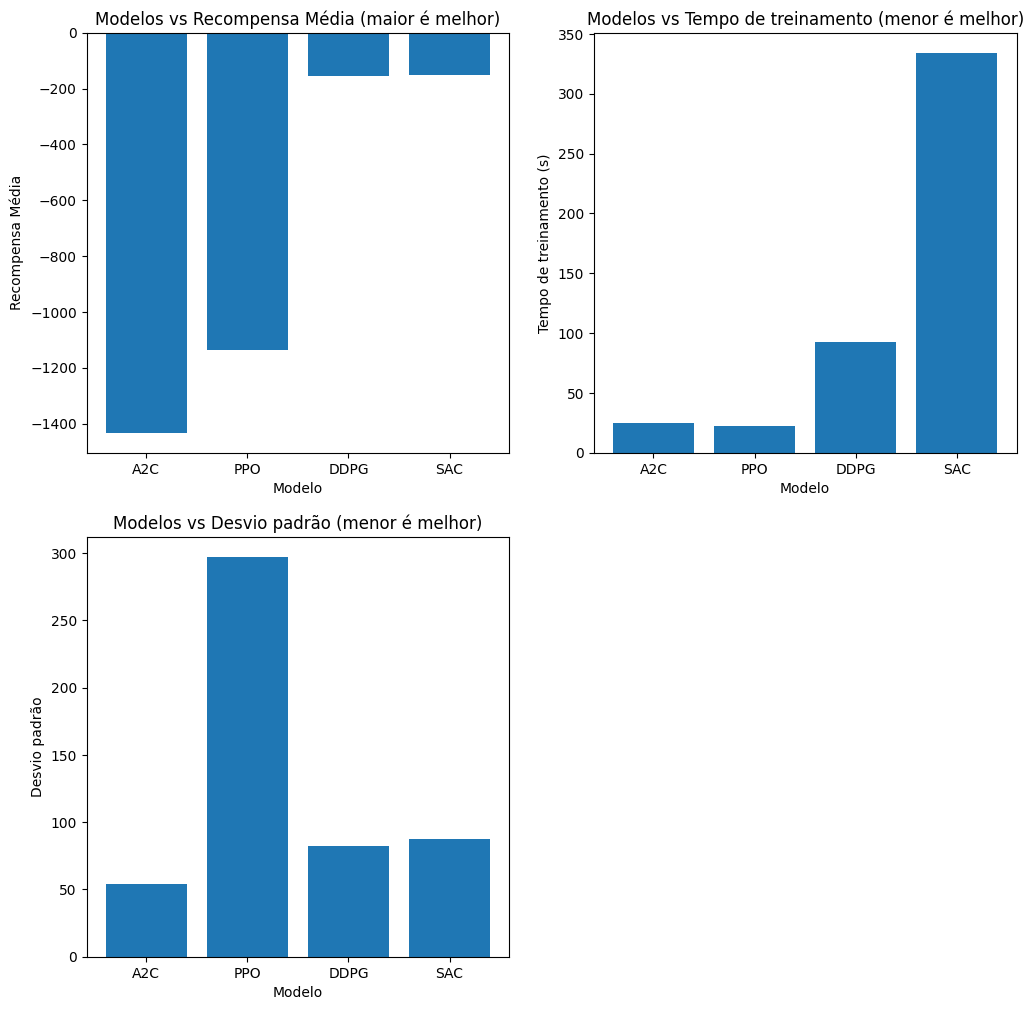

In [16]:
### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
import matplotlib.pyplot as plt

x_graph = list(algorithms_dict.keys()) # obtemos os valores que iram no eixo x, os nomes dos modelos
mean_rewards = [] # listas contendo os critérios que serão avaliados
std_rewards = []
times = []
for key, values in algorithms_dict.items():
    mean_rewards.append(values["mean_reward"])
    std_rewards.append(values["std_reward"])
    times.append(values["time"])

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

fig.delaxes(ax[1, 1])

ax[0, 0].bar(x_graph, mean_rewards)
ax[0, 0].set_title("Modelos vs Recompensa Média (maior é melhor)")
ax[0, 0].set_ylabel("Recompensa Média")
ax[0, 0].set_xlabel("Modelo")

ax[1, 0].bar(x_graph, std_rewards)
ax[1, 0].set_title("Modelos vs Desvio padrão (menor é melhor)")
ax[1, 0].set_ylabel("Desvio padrão")
ax[1, 0].set_xlabel("Modelo")

ax[0, 1].bar(x_graph, times)
ax[0, 1].set_title("Modelos vs Tempo de treinamento (menor é melhor)")
ax[0, 1].set_ylabel("Tempo de treinamento (s)")
ax[0, 1].set_xlabel("Modelo")

# Análise
## Ambiente

Neste ambiente, podemos notar que a recompensa tem expressão: $$r = -(\theta{}^2 + 0.1 * \dot{\theta}^2 + 0.001 * \tau{})$$
Sendo theta o ângulo que o pêndulo faz com a vertical conforme a figura abaixo:
<img src="img/pendulo.png"  width="600" height="400"> <br>
Com isso em mente, o estado que desejamos obter deve ter $\theta{} = 0$, $\dot{\theta} = 0$ e $\tau{} = 0$, substituindo na fórmula, podemos perceber que a recompensa ideal é $r = 0$ <br>
Além disso podemos verificar que os espaços de atuação são contínuos, então é provável que os modelos voltados para problemas discretos não se deêm tão bem com este problema.



## Modelos
Nesta análise foram testados os modelos A2C, PPO, DDPG e SAC <br>
O modelo A2C (Advantage Actor-Critic) utiliza várias agentes em paralelos, que coletam dados sobre o ambiente executando ações, e esses dados são enviados para atualizar os pesos das RNAs dos atores e dos críticos. <br>
Já o modelo PPO (Proximal Policy Optimization) funciona de forma parecida com A2C, possuíndo também os múltiplos agentes em paralelo mas possuí algumas otimizações, como envio de menos dados por mais passos, resultando contas mais simples e menos tempo de treinamento. <br>
O modelo DDPG (Deep Deterministic Policy Gradient) atua em espaços de ação contínuo, e utiliza primariamente equações de bellman (não sei explicar oque são) para aprender as ações e as políticas. <br>
Por fim, o modelo SAC (Soft Actor-Critic) tem como ideia principal e redução da entropia na política
ou seja, tenta por reduzir a aleatoriedade da política, desta forma, quando um agente realiza uma ação
se utilizando da política, ao ínves de máximizar o retorno, tenta máximizar uma função retorno menos entropia. <br>

Verificando os gráficos, logo de cara é possível perceber que os modelos DDPG e SAC possuem desempenho bastante superior quanto à recompensa média que os outros dois algorítmos, isto provavelmente se da pelo fato destes dois serem modelos voltados para ambientes contínuos, enquanto A2C e PPO são mais voltados para ambientes discretos.

Em quesito de desvio padrão, podemos ver que ambos DDPG e SAC possuem desvio muito parecido não sendo muito esclarecedor sobre qual deve ser escolhido

O desempate vem pelo tempo de treinamento, onde podemos perceber que o SAC possui um tempo de treinamento muito elevado em comparação com todos os outros modelos


### Escolha do Algoritmo

Após testar e analisar diversos algoritmos diferentes, qual foi o escolhido?

_Pergunta Extra:_ você usou algum critério para escolher quais algoritmos seriam testados?

In [13]:
### Qual foi o algoritmo escolhido?
# O algorítmo escolhido foi DDPG!
# Os critérios utilizados foram descritos na análise